In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train_df = pd.read_excel('Flight_train_set.xlsx')
test_df = pd.read_excel('Flight_test_set.xlsx')

In [4]:
train_df.shape, test_df.shape

((10683, 11), (2671, 10))

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Merging both datasets with eachother

In [9]:
df = train_df.append(test_df,sort=False)

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [11]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [12]:
df.shape

(13354, 11)

In [13]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Feature Engineering

We have almost every other feature as 'object' dtype. Thus, we need to work on this aspect

In our data, even date is in the object dtype

Always remember, whenever 'date' records are there, try to keep them in form of years,months,days,hours,mins or sec.

This is because our ML Alhgos do not understand this date format

In [14]:
df['Date_of_Journey'].str.split('/').str[2]

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2666    2019
2667    2019
2668    2019
2669    2019
2670    2019
Name: Date_of_Journey, Length: 13354, dtype: object

In [15]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[1]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [16]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,03,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,05,05,2019


In [17]:
del df['Date_of_Journey']


df.drop(['Date_of_journey'],axis=1)

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,03,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,05,05,2019


In [19]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

Still we have our Date,month & year in object dtype.
We need to convert them to 'int' dtypes

In [20]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [21]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [22]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,5,2019


Now we will work on 'Arrival Time'

In [23]:
df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [24]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [25]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,3,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,5,2019


In [26]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
df['Total_Stops'].isna().count()

13354

In [29]:
df['Total_Stops'].isna().sum()

1

In [30]:
len(df['Total_Stops'])

13354

In [31]:
df[df['Total_Stops'].isna()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,5,5,2019


Just one 'NaN' value is there, we will use either 'fillna' or 'bfill'

In [32]:
df['Total_Stops'] = df['Total_Stops'].fillna(value='1 stop')

In [33]:
df['Total_Stops'].isna().sum()

0

In [34]:
df['Total_Stops'] = df['Total_Stops'].replace(to_replace='non-stop',value='0 stops')

In [35]:
df['Total_Stops'].unique()

array(['0 stops', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [36]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stops,No info,3897.0,3,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,5,2019


In [37]:
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0]

In [38]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,3,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,5,5,2019


In [39]:
df['Total_Stops'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [40]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [41]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [42]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [43]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [44]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,3,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,5,5,2019


In [45]:
df['Arrival_Time'].str.split(':')

0       [01, 10]
1       [13, 15]
2       [04, 25]
3       [23, 30]
4       [21, 35]
          ...   
2666    [20, 25]
2667    [16, 55]
2668    [04, 25]
2669    [19, 15]
2670    [19, 15]
Name: Arrival_Time, Length: 13354, dtype: object

In [46]:
df['Arrival Hr'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival Min'] = df['Arrival_Time'].str.split(':').str[1]

In [47]:
df = df.drop(['Arrival_Time'],axis=1)

In [48]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,3,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,5,5,2019,13,15


In [49]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival Hr          object
Arrival Min         object
dtype: object

In [50]:
df['Depart Hr'] = df['Dep_Time'].str.split(':').str[0]
df['Depart Min'] = df['Dep_Time'].str.split(':').str[1]

In [51]:
df = df.drop(['Dep_Time'],axis=1)

In [52]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,3,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,5,5,2019,13,15,05,50


In [53]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival Hr          object
Arrival Min         object
Depart Hr           object
Depart Min          object
dtype: object

In [54]:
df['Arrival Hr']= df['Arrival Hr'].astype(int)
df['Arrival Min']= df['Arrival Min'].astype(int)
df['Depart Hr']= df['Depart Hr'].astype(int)
df['Depart Min']= df['Depart Min'].astype(int)

In [55]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival Hr           int32
Arrival Min          int32
Depart Hr            int32
Depart Min           int32
dtype: object

In [56]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,3,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,5,5,2019,13,15,5,50


In [58]:
df['Route'].str.split()

0                       [BLR, →, DEL]
1       [CCU, →, IXR, →, BBI, →, BLR]
2       [DEL, →, LKO, →, BOM, →, COK]
3               [CCU, →, NAG, →, BLR]
4               [BLR, →, NAG, →, DEL]
                    ...              
2666            [CCU, →, DEL, →, BLR]
2667                    [CCU, →, BLR]
2668            [DEL, →, BOM, →, COK]
2669            [DEL, →, BOM, →, COK]
2670            [DEL, →, BOM, →, COK]
Name: Route, Length: 13354, dtype: object

In [59]:
df['Route'].str.split(' →')

0                   [BLR,  DEL]
1       [CCU,  IXR,  BBI,  BLR]
2       [DEL,  LKO,  BOM,  COK]
3             [CCU,  NAG,  BLR]
4             [BLR,  NAG,  DEL]
                 ...           
2666          [CCU,  DEL,  BLR]
2667                [CCU,  BLR]
2668          [DEL,  BOM,  COK]
2669          [DEL,  BOM,  COK]
2670          [DEL,  BOM,  COK]
Name: Route, Length: 13354, dtype: object

In [60]:
df['Route'].str.split(' →').str[0]

0       BLR
1       CCU
2       DEL
3       CCU
4       BLR
       ... 
2666    CCU
2667    CCU
2668    DEL
2669    DEL
2670    DEL
Name: Route, Length: 13354, dtype: object

In [61]:
df['Route'].str.split('→ ')

0                   [BLR , DEL]
1       [CCU , IXR , BBI , BLR]
2       [DEL , LKO , BOM , COK]
3             [CCU , NAG , BLR]
4             [BLR , NAG , DEL]
                 ...           
2666          [CCU , DEL , BLR]
2667                [CCU , BLR]
2668          [DEL , BOM , COK]
2669          [DEL , BOM , COK]
2670          [DEL , BOM , COK]
Name: Route, Length: 13354, dtype: object

In [66]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [67]:
df['Route_1'] = df['Route'].str.split('→ ').str[0]
df['Route_2'] = df['Route'].str.split('→ ').str[1]
df['Route_3'] = df['Route'].str.split('→ ').str[2]
df['Route_4'] = df['Route'].str.split('→ ').str[3]
df['Route_5'] = df['Route'].str.split('→ ').str[4]
df['Route_6'] = df['Route'].str.split('→ ').str[5]

In [69]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival Hr,Arrival Min,Depart Hr,Depart Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,3,3,...,1,10,22,20,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,5,5,...,13,15,5,50,CCU,IXR,BBI,BLR,NaN,NaN


In [70]:
df = df.drop(['Route'],axis=1)

In [71]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,3,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,5,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,NaN


In [72]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival Hr           int32
Arrival Min          int32
Depart Hr            int32
Depart Min           int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
Route_6             object
dtype: object

In [76]:
df['Route_1'].isnull().sum()

1

#### Evaluating PRICE feature

In [80]:
df['Price'].isna().sum()

2671

In [78]:
import seaborn as sns

<AxesSubplot:xlabel='Price'>

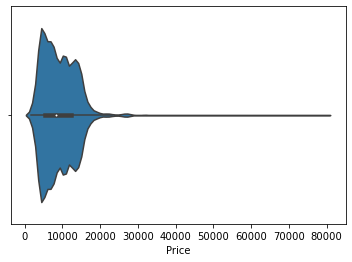

In [79]:
sns.violinplot(x='Price',data=df)

In [81]:
df['Price'].value_counts()

10262.0    258
10844.0    212
7229.0     162
4804.0     160
4823.0     131
          ... 
14462.0      1
6349.0       1
3758.0       1
6834.0       1
9585.0       1
Name: Price, Length: 1870, dtype: int64

In [85]:
df['Price'].fillna((df['Price'].mean()),inplace=True)

In [86]:
df['Price'].isna().sum()

0

In [87]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)
df['Route_6'].fillna('None',inplace=True)

In [88]:
df['Route_1'].isna().sum()

0

In [89]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,3,3,2019,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,5,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,None


In [90]:
df = df.drop(['Duration'],axis=1)

In [91]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,3,3,2019,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,5,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,None


In [94]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival Hr           int32
Arrival Min          int32
Depart Hr            int32
Depart Min           int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
Route_6             object
dtype: object

In [95]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival Hr         0
Arrival Min        0
Depart Hr          0
Depart Min         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

There are no NUll Values anymore in any column/feature.

In [96]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,3,3,2019,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,5,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,None


Make a look at Source  & Destination feature. There are lot of Categoprical values.
So if we want to convert them to integeral values, then One-Hot Encoding can't be a solution due to large no. of Categories.

Thus we'll be making use of Label Encoding

# Label Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder

In [98]:
encoder = LabelEncoder()

In [99]:
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])
df['Route_1'] = encoder.fit_transform(df['Route_1'])
df['Route_2'] = encoder.fit_transform(df['Route_2'])
df['Route_3'] = encoder.fit_transform(df['Route_3'])
df['Route_4'] = encoder.fit_transform(df['Route_4'])
df['Route_5'] = encoder.fit_transform(df['Route_5'])
df['Route_6'] = encoder.fit_transform(df['Route_6'])

In [100]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hr,Arrival Min,Depart Hr,Depart Min,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,0,5,0,8,3897.0,3,3,2019,1,10,22,20,0,13,24,12,4,1
1,1,3,0,2,8,7662.0,5,5,2019,13,15,5,50,2,25,1,3,4,1


In [101]:
df.dtypes

Airline              int32
Source               int32
Destination          int32
Total_Stops          int32
Additional_Info      int32
Price              float64
Date                 int32
Month                int32
Year                 int32
Arrival Hr           int32
Arrival Min          int32
Depart Hr            int32
Depart Min           int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Route_5              int32
Route_6              int32
dtype: object

# Feature Selection

In [103]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [104]:
df_train = df[0:10683]
df_test = df[10683:]

In [105]:
X = df_train.drop(['Price'],axis=1)
y = df_train['Price']

In [107]:
X.shape, y.shape

((10683, 18), (10683,))

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
X_train.shape, X_test.shape

((7478, 18), (3205, 18))

#### Feature Selection begins from here

Lasso(alpha=)

this alpha hyperparamter works as a penalizing paramtere.
As aplha value increases, then less no. of features are being selected 

In [112]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [113]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [114]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [116]:
X_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Year', 'Arrival Hr', 'Arrival Min', 'Depart Hr',
       'Depart Min', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Route_6'],
      dtype='object')

In [117]:
X_train.columns[(model.get_support())]

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Arrival Hr', 'Arrival Min', 'Depart Hr', 'Depart Min',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6'],
      dtype='object')

In [118]:
selected_features = X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Arrival Hr', 'Arrival Min', 'Depart Hr', 'Depart Min',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6'],
      dtype='object')

In [120]:
X_train = X_train.drop(['Year','Month'],axis=1)

In [121]:
X_test = X_test.drop(['Year','Month'],axis=1)

# Feature Selection - using ExtraTreeRegressor

In [153]:
X.shape

(10683, 18)

In [154]:
from sklearn.ensemble import ExtraTreesRegressor

In [155]:
selection = ExtraTreesRegressor()

In [156]:
selection.fit(X,y)

ExtraTreesRegressor()

In [157]:
print(selection.feature_importances_)

[1.53736244e-01 1.23821947e-02 2.64688155e-02 1.81717559e-01
 9.49494744e-02 2.26863745e-02 2.36236666e-02 0.00000000e+00
 2.93311744e-02 1.97702184e-02 3.73520713e-02 3.01435679e-02
 1.43723442e-02 7.07913674e-02 2.48099895e-01 3.41822204e-02
 3.67430174e-04 2.53815575e-05]


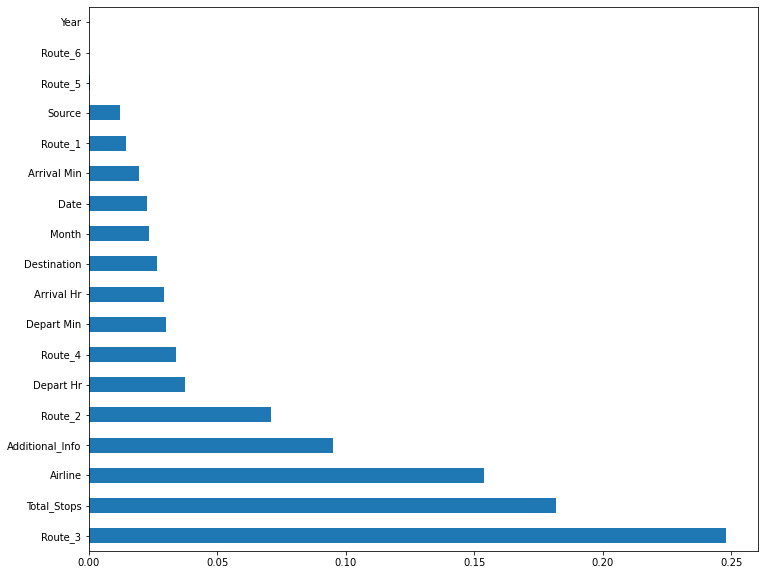

In [160]:
plt.figure(figsize=(12,10))
feature_importance = pd.Series(selection.feature_importances_, index = X.columns)
feature_importance.nlargest(18).plot(kind='barh')
plt.show()                        

# Regressor Model

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
from sklearn.model_selection import GridSearchCV

In [127]:
rf = RandomForestRegressor()

In [137]:
rf_prams = {'n_estimators':list(range(10,30)),
           'max_depth':[1,5,9,10]}

In [138]:
grid = GridSearchCV(estimator=rf,param_grid=rf_prams,cv=5)

In [139]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 5, 9, 10],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29]})

In [140]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 23}

In [141]:
rf_best = RandomForestRegressor(n_estimators=23,max_depth=10)

In [142]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [143]:
y_pred = rf.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error,r2_score

In [149]:
mean_squared_error(y_pred,y_test)

5107171.445864141

In [150]:
r2_score(y_pred,y_test)

0.7251053331407751

R2 Score is between 0 and 1, the closer to 1, the better the regression fit.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

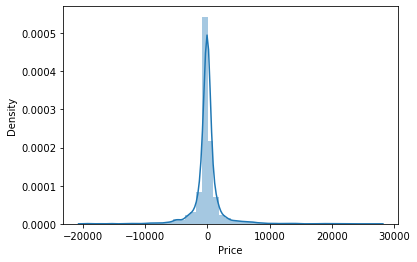

In [151]:
sns.distplot(y_test-y_pred)